Loaded 5961 satellites
STARLINK-1122 catalog #44949 epoch 2024-05-15 19:40:57 UTC at Azimuth: 167.38568030291918°, Altitude: 30.575745917616388°, Distance: 980.3433089865832 km
STARLINK-1080 catalog #44961 epoch 2024-05-15 21:13:50 UTC at Azimuth: 253.54912765628958°, Altitude: 45.47207621953921°, Distance: 745.6578653555622 km
STARLINK-1186 catalog #45099 epoch 2024-05-15 21:00:34 UTC at Azimuth: 106.4199795088207°, Altitude: 30.790515895661038°, Distance: 976.7917398349488 km
STARLINK-1624 catalog #46130 epoch 2024-05-15 21:07:13 UTC at Azimuth: 8.129684846199488°, Altitude: 42.15315239537112°, Distance: 786.9721052078703 km
STARLINK-1598 catalog #46160 epoch 2024-05-15 21:09:52 UTC at Azimuth: 41.71245129804641°, Altitude: 38.92157265101962°, Distance: 831.2418450275228 km
STARLINK-1766 catalog #46677 epoch 2024-05-15 20:16:17 UTC at Azimuth: 235.6636362180344°, Altitude: 43.42461254272612°, Distance: 576.9458961731874 km
STARLINK-1911 catalog #46749 epoch 2024-05-15 03:43:35 UTC at

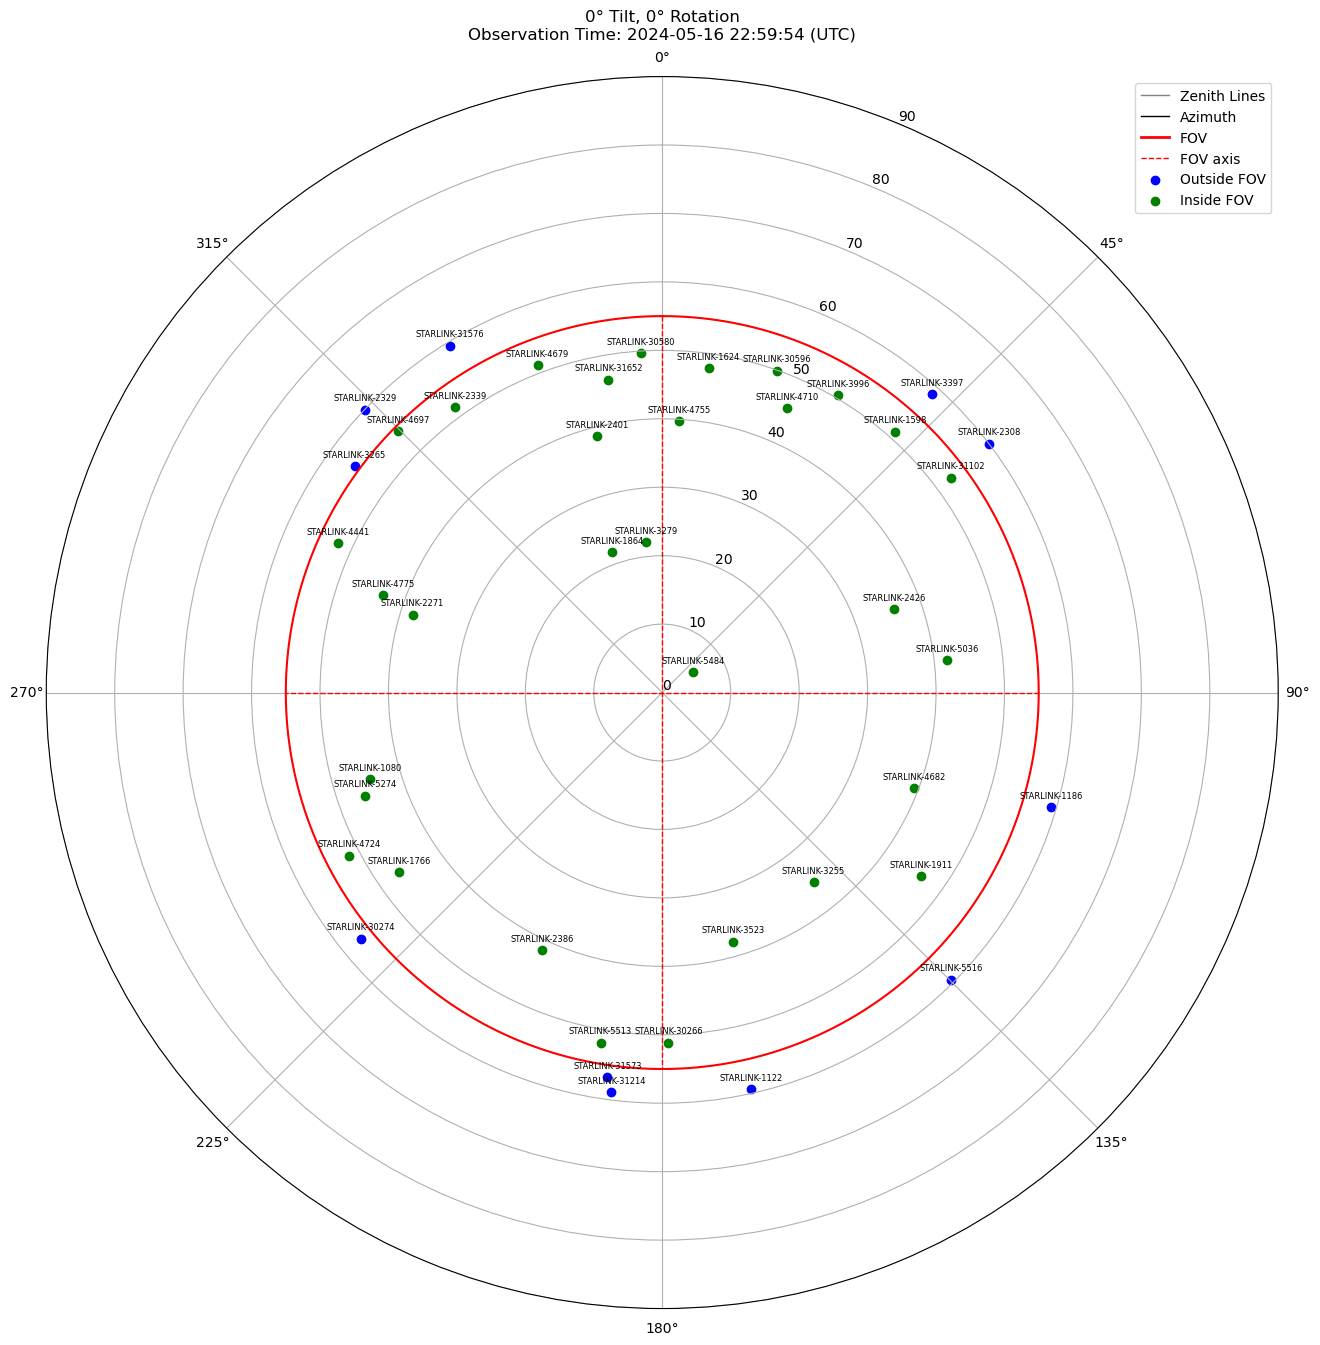

Satellites inside the FOV: ['STARLINK-1080', 'STARLINK-1624', 'STARLINK-1598', 'STARLINK-1766', 'STARLINK-1911', 'STARLINK-1864', 'STARLINK-2386', 'STARLINK-2401', 'STARLINK-2426', 'STARLINK-2339', 'STARLINK-2271', 'STARLINK-3279', 'STARLINK-3255', 'STARLINK-3523', 'STARLINK-3996', 'STARLINK-4441', 'STARLINK-4682', 'STARLINK-4724', 'STARLINK-4697', 'STARLINK-4679', 'STARLINK-4710', 'STARLINK-4755', 'STARLINK-5036', 'STARLINK-4775', 'STARLINK-5274', 'STARLINK-5484', 'STARLINK-5513', 'STARLINK-30266', 'STARLINK-30596', 'STARLINK-30580', 'STARLINK-31102', 'STARLINK-31652']


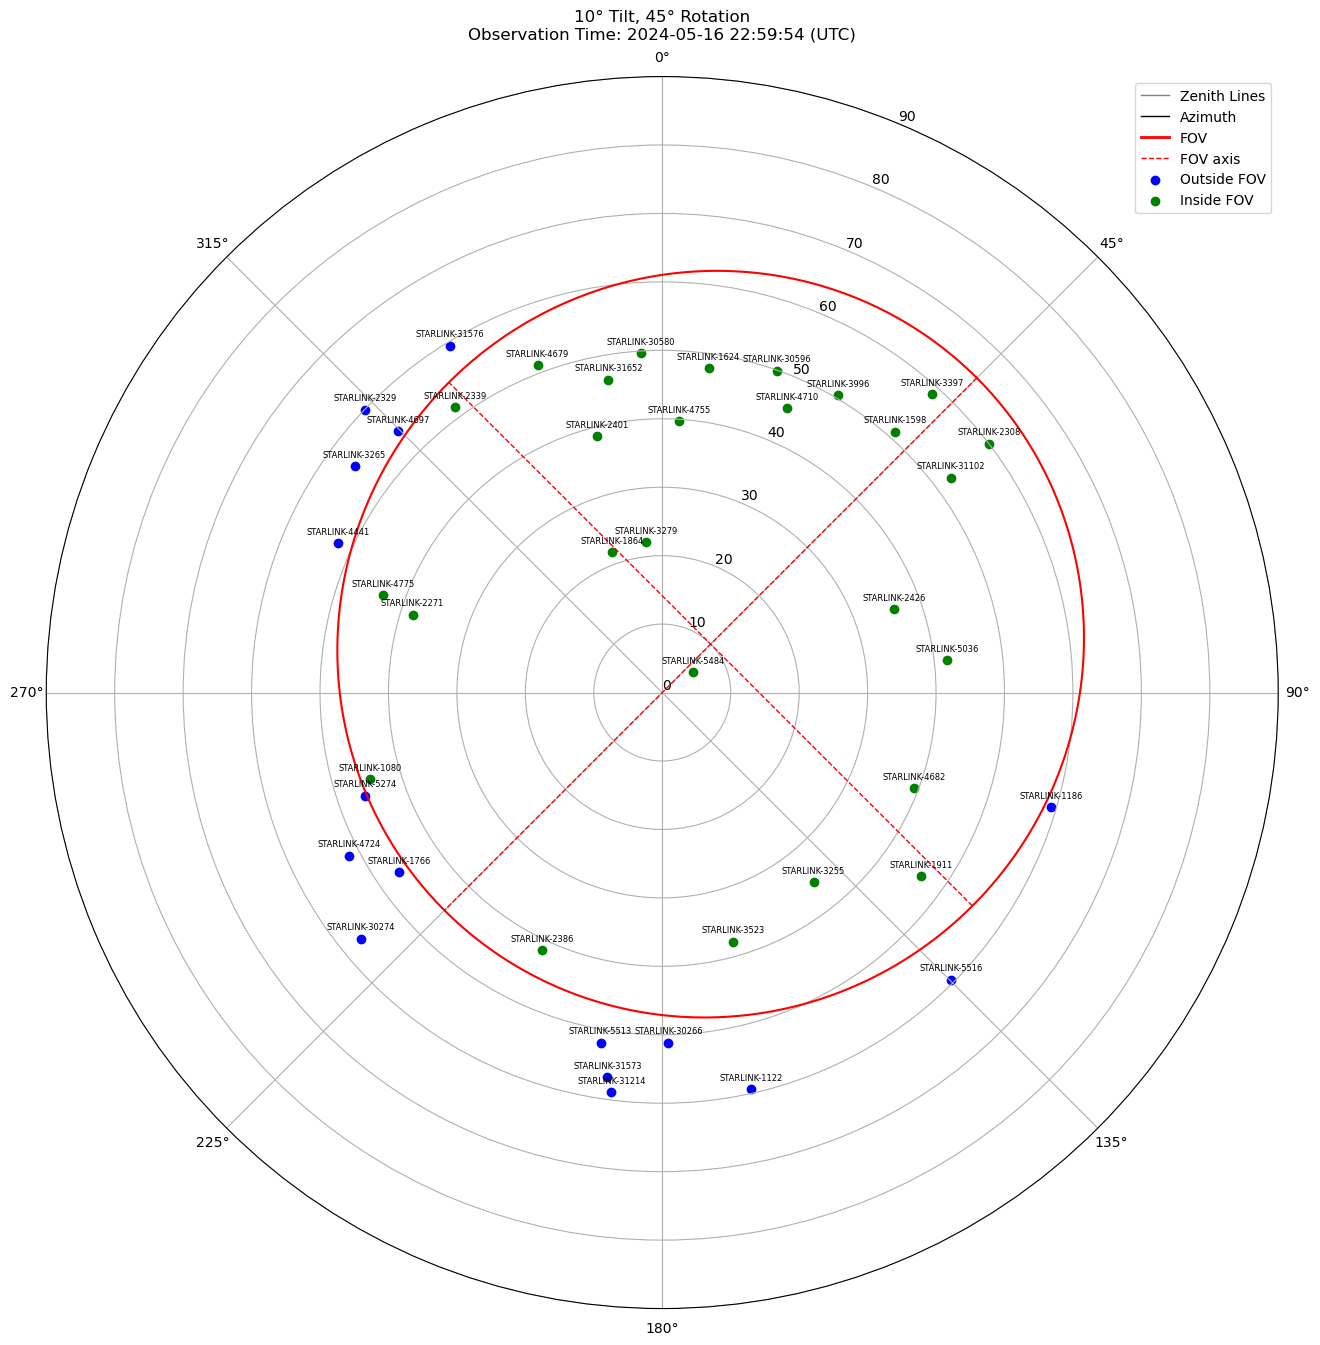

Satellites inside the FOV: ['STARLINK-1080', 'STARLINK-1624', 'STARLINK-1598', 'STARLINK-1911', 'STARLINK-1864', 'STARLINK-2386', 'STARLINK-2401', 'STARLINK-2426', 'STARLINK-2339', 'STARLINK-2308', 'STARLINK-2271', 'STARLINK-3279', 'STARLINK-3255', 'STARLINK-3397', 'STARLINK-3523', 'STARLINK-3996', 'STARLINK-4682', 'STARLINK-4679', 'STARLINK-4710', 'STARLINK-4755', 'STARLINK-5036', 'STARLINK-4775', 'STARLINK-5484', 'STARLINK-30596', 'STARLINK-30580', 'STARLINK-31102', 'STARLINK-31652']


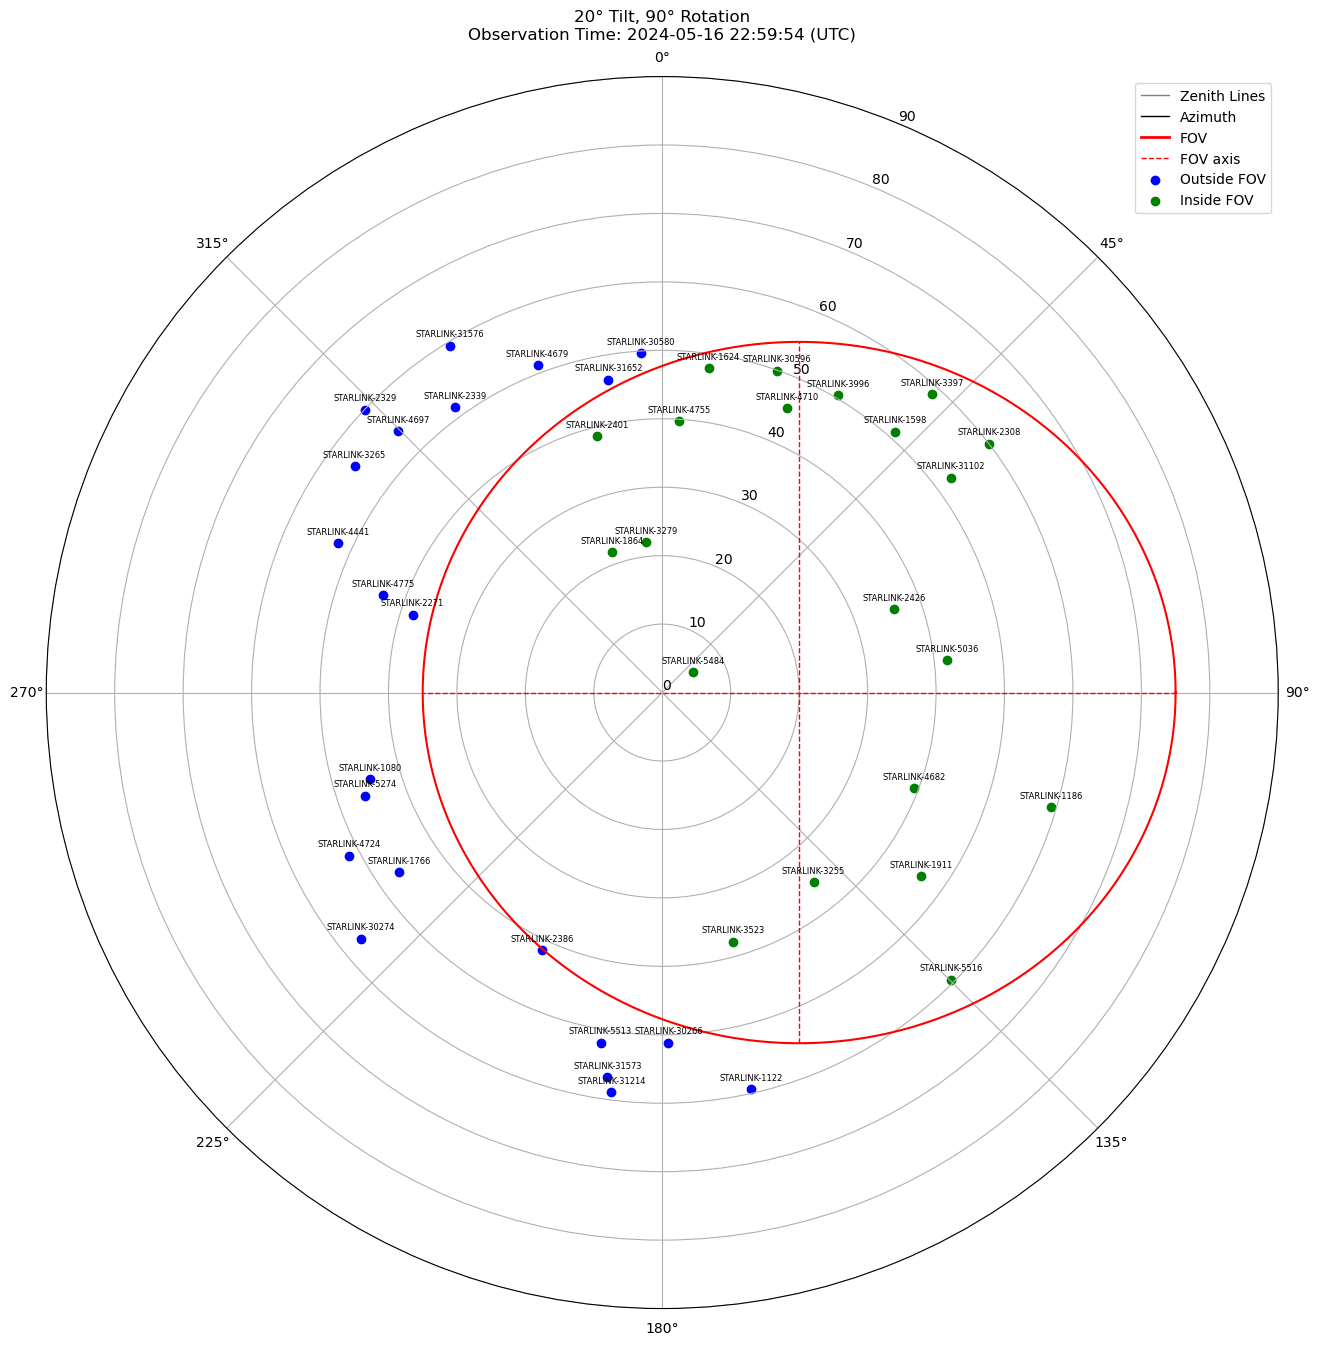

Satellites inside the FOV: ['STARLINK-1186', 'STARLINK-1624', 'STARLINK-1598', 'STARLINK-1911', 'STARLINK-1864', 'STARLINK-2401', 'STARLINK-2426', 'STARLINK-2308', 'STARLINK-3279', 'STARLINK-3255', 'STARLINK-3397', 'STARLINK-3523', 'STARLINK-3996', 'STARLINK-4682', 'STARLINK-4710', 'STARLINK-4755', 'STARLINK-5036', 'STARLINK-5484', 'STARLINK-5516', 'STARLINK-30596', 'STARLINK-31102']


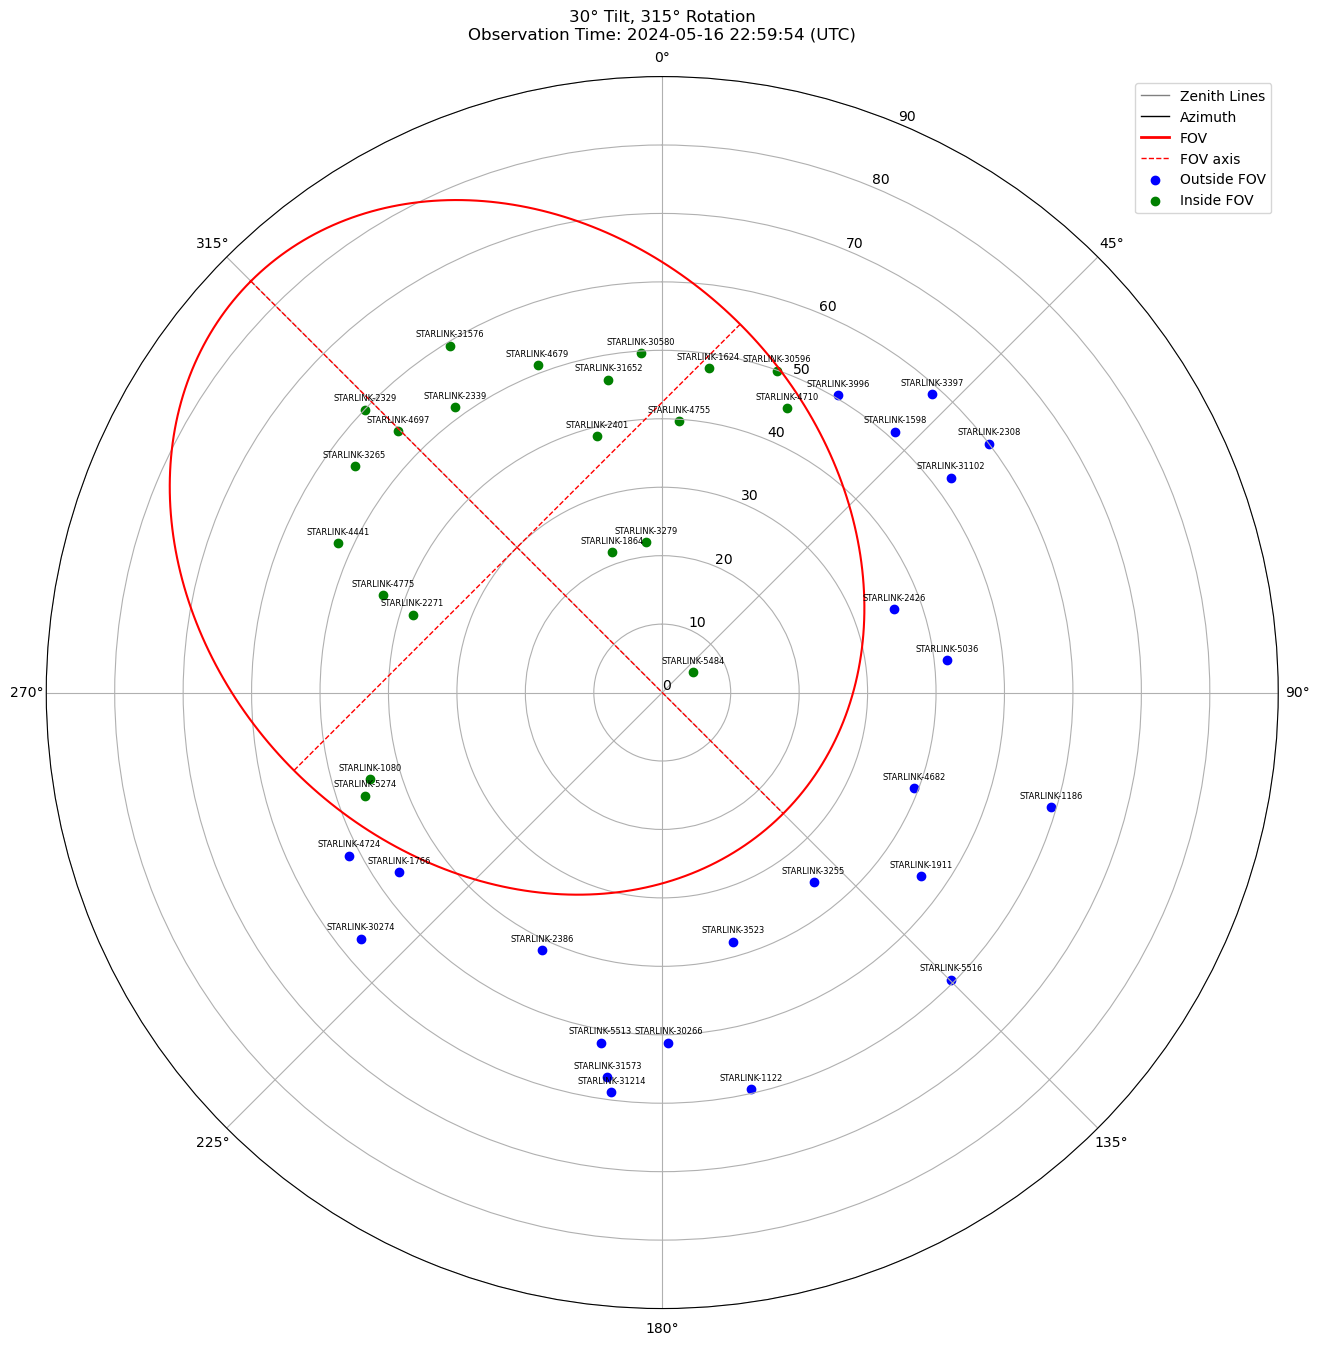

Satellites inside the FOV: ['STARLINK-1080', 'STARLINK-1624', 'STARLINK-1864', 'STARLINK-2401', 'STARLINK-2329', 'STARLINK-2339', 'STARLINK-2271', 'STARLINK-3265', 'STARLINK-3279', 'STARLINK-4441', 'STARLINK-4697', 'STARLINK-4679', 'STARLINK-4710', 'STARLINK-4755', 'STARLINK-4775', 'STARLINK-5274', 'STARLINK-5484', 'STARLINK-30596', 'STARLINK-30580', 'STARLINK-31576', 'STARLINK-31652']


In [23]:
from skyfield.api import load, wgs84, Topos
import matplotlib.pyplot as plt
import numpy as np
import math

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def set_observation_time(year, month, day, hour, minute, second):
    ts = load.timescale()
    return ts.utc(year, month, day, hour, minute, second)

def calculate_satellite_positions(satellites, observer_location, observation_time):
    locations = []
    sats = []
    min_elevation = 30
    for satellite in satellites:
        difference = satellite - observer_location
        topocentric = difference.at(observation_time)
        alt, az, distance = topocentric.altaz()
        if alt.degrees > min_elevation:
            loc = [(90 - alt.degrees, np.radians(az.degrees))]
            locations.append(loc)
            sats.append(satellite)
            print(f"{satellite} at Azimuth: {az.degrees}°, Altitude: {alt.degrees}°, Distance: {distance.km} km")
    return locations, sats

def rotate_points(x, y, angle):
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)
    return x_rot, y_rot

def draw_fov(tilt_deg, rotation_deg, locations, sats, observation_time):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(16, 16))

    # Plot settings
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    zenith_legend = plt.Line2D([0], [0], color='gray', linestyle='-', linewidth=1, label='Zenith Lines')
    azimuth_legend = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Azimuth')
    FOV = plt.Line2D([0], [0], color='red', linestyle='-', linewidth=2, label='FOV')
    Axis = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='FOV axis')
    ax.add_artist(zenith_legend)
    ax.add_artist(azimuth_legend)
    ax.add_artist(FOV)
    ax.add_artist(Axis)

    # FOV ellipse
    base_radius = 55
    center_shift = tilt_deg
    x_radius = base_radius
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)

    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta) + center_shift
    y = y_radius * np.sin(theta)
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x) + np.deg2rad(rotation_deg)
    ax.plot(angles, r, 'r')

    # Plot major and minor axes
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, np.deg2rad(rotation_deg))
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, np.deg2rad(rotation_deg))
    ax.plot(np.arctan2(major_axis_y_rot, major_axis_x_rot), np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2), 'red', linestyle='--', linewidth=1)
    ax.plot(np.arctan2(minor_axis_y_rot, minor_axis_x_rot), np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2), 'red', linestyle='--', linewidth=1)

    inside_fov = []

    # Plot satellites
    for loc, sat in zip(locations, sats):
        loc = np.array(loc)
        r = loc[:, 0]
        angle = loc[:, 1]
        inside = False
        for r_i, angle_i in zip(r, angle):
            x_point = r_i * np.cos(angle_i)
            y_point = r_i * np.sin(angle_i)
            x_point_rot, y_point_rot = rotate_points(x_point, y_point, -np.deg2rad(rotation_deg))
            x_point_rot -= center_shift
            if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
                inside = True
                break
        if inside:
            ax.scatter(angle, r, color="g", label="Inside FOV")
            inside_fov.append(sat.name)
        else:
            ax.scatter(angle, r, color="b", label="Outside FOV")
        ax.annotate(sat.name, xy=(angle, r), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=6, bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor='none', alpha=0.6))

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Format the observation time
    observation_time_str = observation_time.utc_strftime('%Y-%m-%d %H:%M:%S (UTC)')
    ax.set_title(f'{tilt_deg}° Tilt, {rotation_deg}° Rotation\nObservation Time: {observation_time_str}', va='bottom')
    
    plt.show()
    print("Satellites inside the FOV:", inside_fov)

if __name__ == "__main__":
    satellites = load_data()
    initial_time = set_observation_time(2024, 5, 16, 22, 59, 54)
    observer_location = Topos(latitude_degrees=48.4284, longitude_degrees=-123.3656, elevation_m=0)
    locations, sats = calculate_satellite_positions(satellites, observer_location, initial_time)
    draw_fov(0, 0, locations, sats, initial_time)
    draw_fov(10, 45, locations, sats, initial_time)
    draw_fov(20, 90, locations, sats, initial_time)
    draw_fov(30, 315, locations, sats, initial_time)
